# Artificial Intelligence
## CA4 - Machine Learning
### Fateme Karami - 810100256


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, f1_score, precision_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from scipy.stats import uniform
import seaborn as sns

# Dataset introduction

### 1. Dataset Structure

In [3]:
df = pd.read_excel('DataSet.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


### 2. Missing Features

In [6]:
num_features = df.count()
num_missing = len(df) - num_features
missing_percentage = num_missing / len(df) * 100
print("number of missing features:\n", num_missing)

number of missing features:
 CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64


In [7]:
print("percentage of missing features:\n", missing_percentage)

percentage of missing features:
 CRIM        0.000000
ZN          0.000000
INDUS       0.000000
CHAS        5.138340
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         5.335968
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           3.952569
LSTAT       0.000000
MEDV       10.671937
dtype: float64


### 3. Unique Features

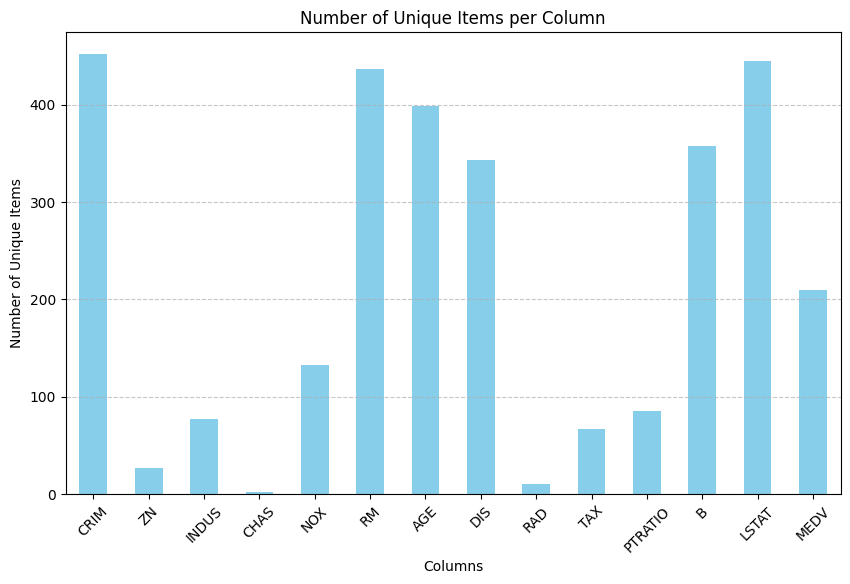

In [8]:
num_unique = df.nunique()
plt.figure(figsize=(10, 6))
num_unique.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Items per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Items')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As shown in the above plot, the number of unique items varies per column. In columns like CRIM (per capita crime rate by town) or LSTAT (% lower status of the population) the items have a large domain and the variety is high. On the other hand in columns like CHAS (Charles River dummy variable) that has a domain of 0 and 1, the variation is very low. Also for columns like RAD (index of accessibility to radial highways) the domain is not small but most of the data has a low value of this attribute (75% of the data has RAD lower than 24) and this causes low variety for the specified column.

### 4. Features Correlation

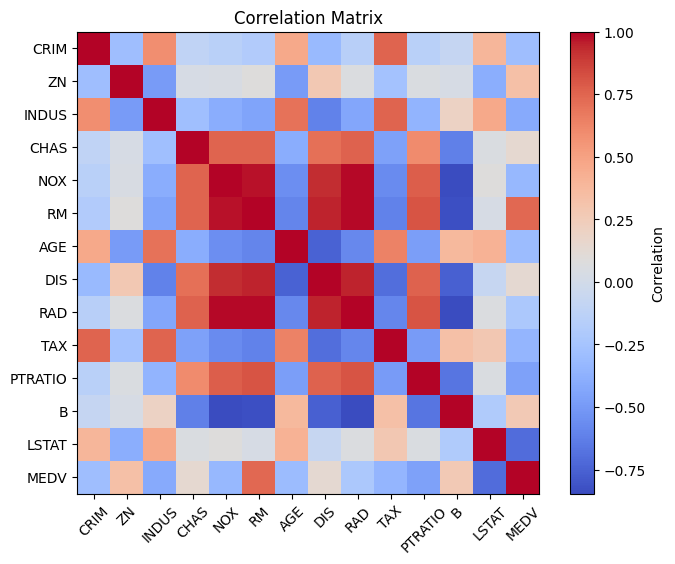

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()

The Correlation Matrix shows the correlation of each two features with each other, positive correlation is shown with red colors and negative correlation in shown with blue.

As seen in the matrix, features like DIS and RAD have high positive correlation with features like CHAS, NOX and RM. This means that they're related and when one of them is high, the other one is probably high as well. On the other hand CHAS, NOX and RM have high negative correlation with B, which means when CHAS, NOX and RM have a high value, B probably has a low value.

Features like CHAS, NOX and RM have near zero correlation with ZN which means they're not related.

The target in this project is MEDV (Median value of owner-occupied homes in $1000s). Features with positive correlation with this feature are RM, ZN, ... and features with negative correlation with it are LSTAT, PTRATIO, .... Features like DIS have near zero correlation with this feature.

### 5. Scatter and Hexbin Plots

#### Scatter plot:
In scatter plots each data point is represented by a dot, with the x-axis representing one feature and the y-axis representing another feature (here it's the target). Scatter plots are used to visualize the relationship or correlation between two features. They help identify patterns, trends, clusters, and outliers in the data.

#### Hexbin plot:
In hexbin plots the data points are binned into hexagonal bins instead of rectangular ones. Each hexagon represents a bin, and the color intensity or density of points within each bin is visualized using a colormap. Hexbin plots are useful for visualizing the distribution and density of data points in a two dimensional space, especially when dealing with a large number of data points. They provide a more informative representation of the data compared to scatter plots, especially when there is significant overlap between data points.

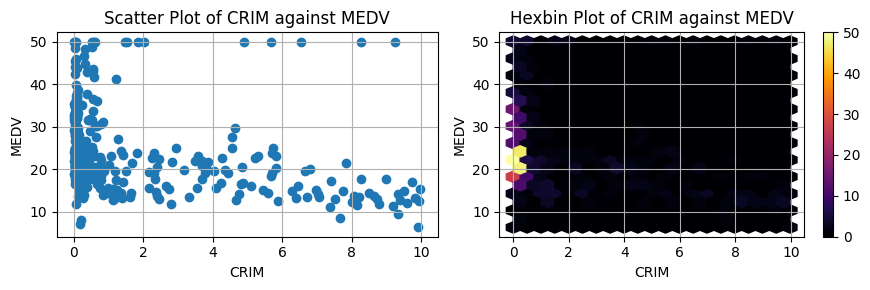

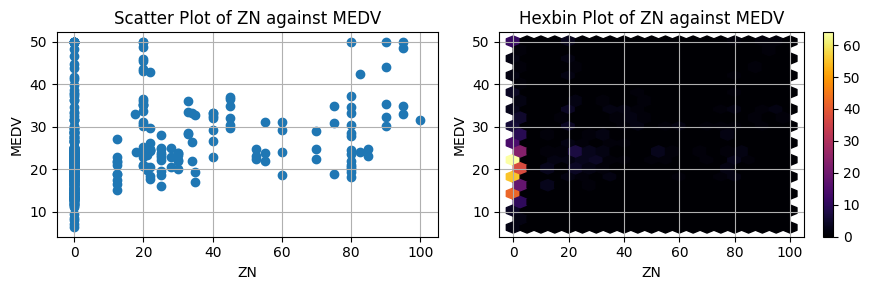

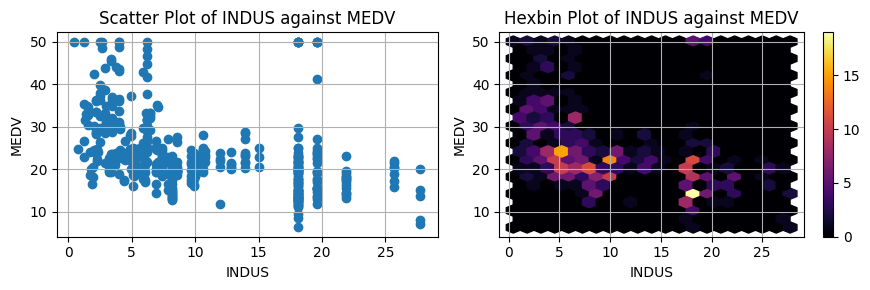

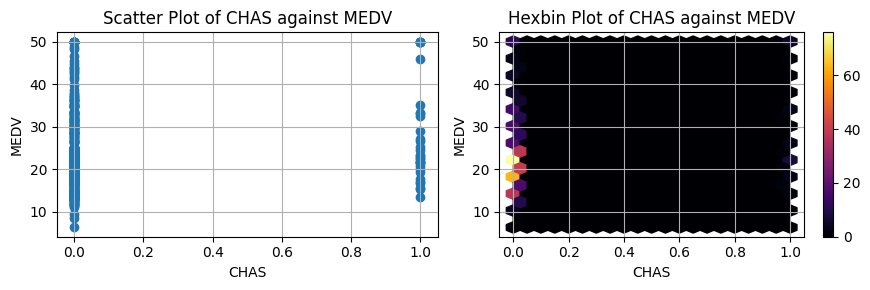

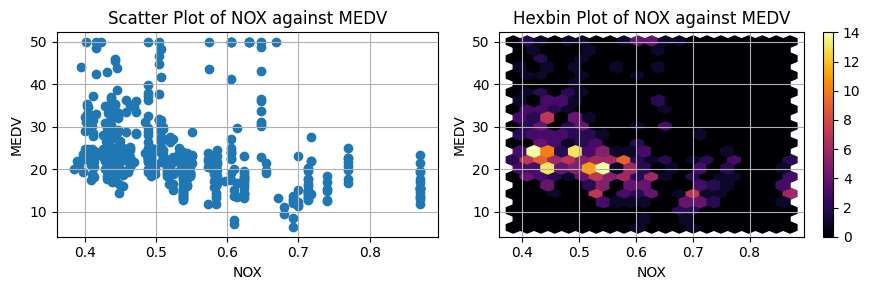

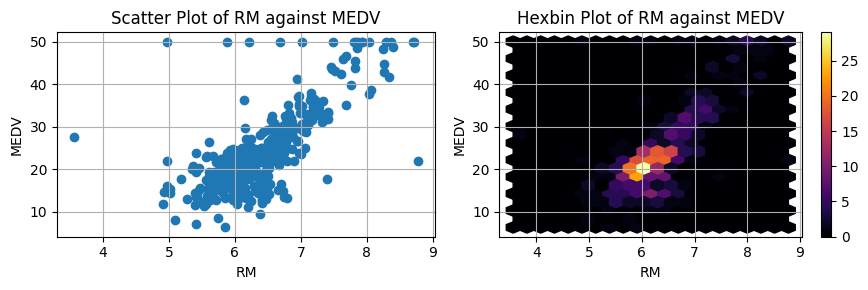

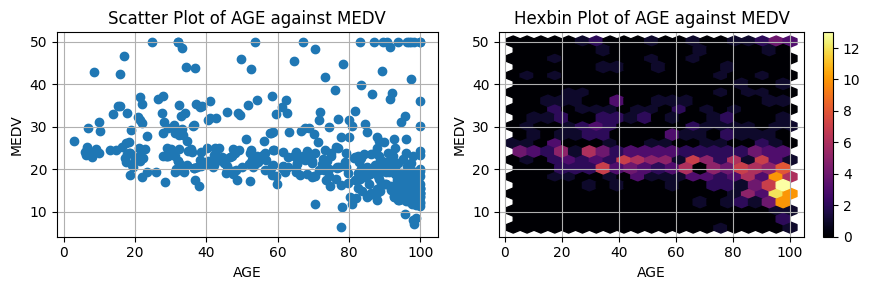

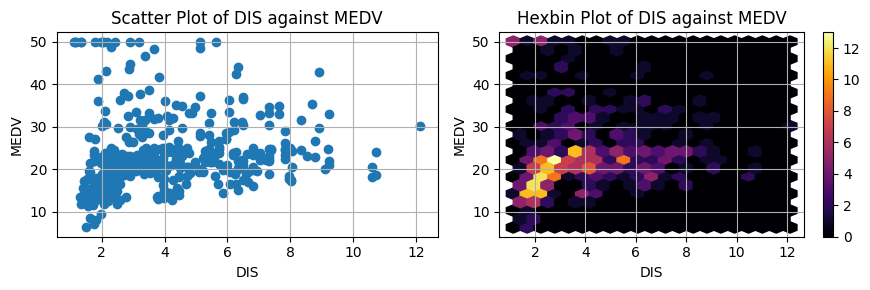

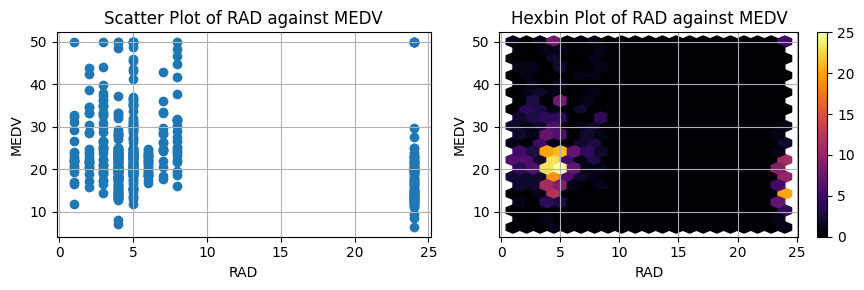

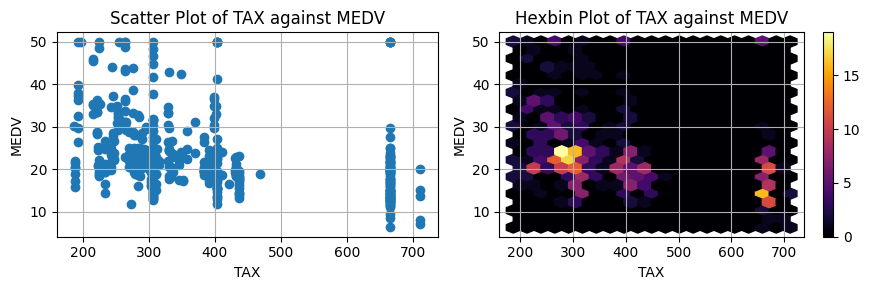

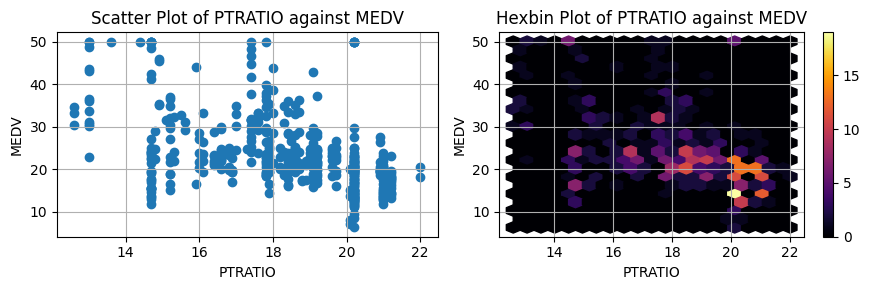

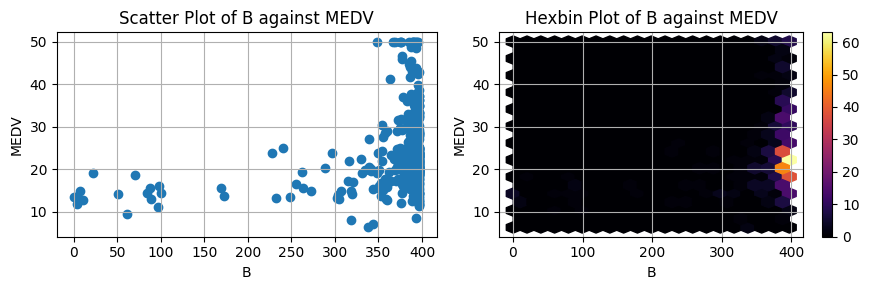

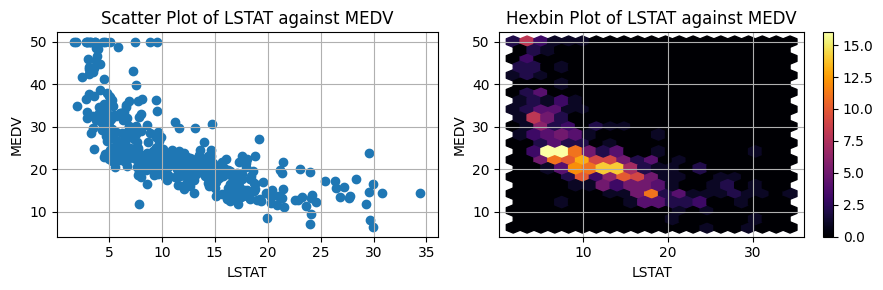

In [10]:
target_column = 'MEDV'
for column in df.columns:
    if column != target_column:
        fig, axs = plt.subplots(1, 2, figsize=(9, 3))
        axs[0].scatter(df[column], df[target_column])
        axs[0].set_xlabel(column)
        axs[0].set_ylabel(target_column)
        axs[0].set_title(f'Scatter Plot of {column} against {target_column}')
        axs[0].grid(True)
        hexb = axs[1].hexbin(df[column], df[target_column], gridsize=20, cmap='inferno')
        axs[1].set_xlabel(column)
        axs[1].set_ylabel(target_column)
        axs[1].set_title(f'Hexbin Plot of {column} against {target_column}')
        axs[1].grid(True)
        plt.tight_layout()
        plt.colorbar(mappable=hexb)
        plt.show()

### 6. Other Plots

#### Box Plot:
A box plot displays the distribution of data based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. A box plot provides a concise visual summary of the distribution of the data, including its central tendency, spread, and presence of outliers. It's useful for comparing the distributions of different groups or variables in a dataset and identifying any notable features such as skewness, symmetry, or variability.

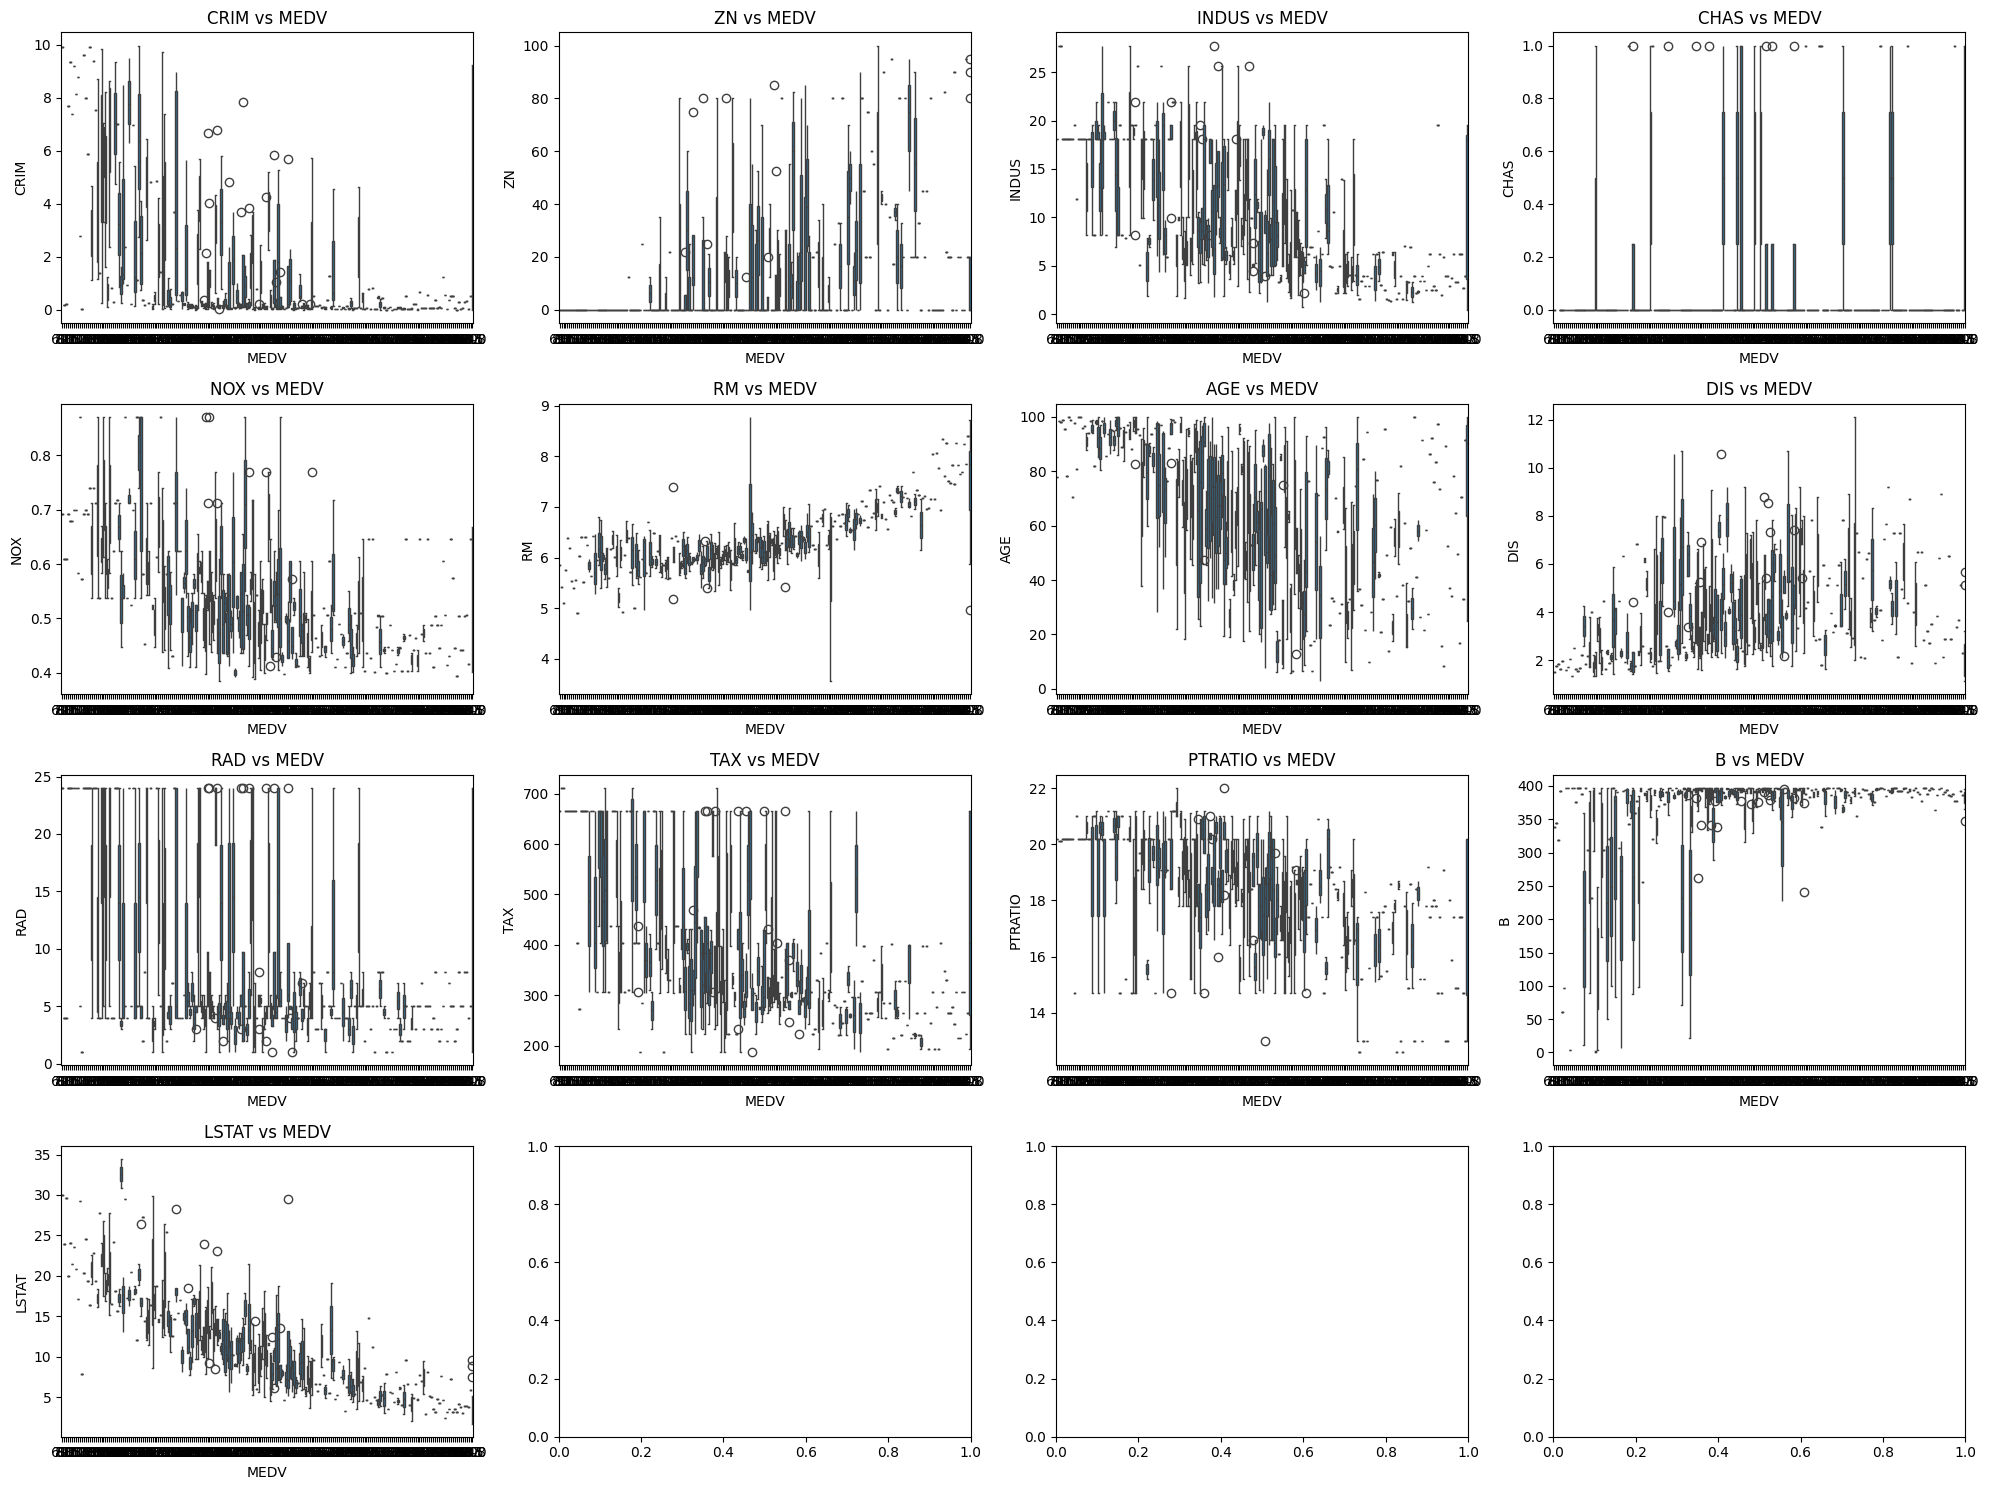

In [11]:
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
axs = axs.flatten()
for i, column in enumerate(df.columns):
    if column != target_column:
        if i < 13:
            sns.boxplot(x=target_column, y=column, data=df, ax=axs[i])
            axs[i].set_xlabel(target_column)
            axs[i].set_ylabel(column)
            axs[i].set_title(f'{column} vs {target_column}')
plt.tight_layout()
plt.show()

# Dataset Preprocessing

### 7. Fixing Missing Values

#### 1. Dropping rows with missing values
This method involves removing entire rows from the DataFrame if they contain any missing values. It's suitable when the missing values are random or negligible in proportion to the total dataset size. However, it can lead to loss of potentially valuable information.

In [12]:
df_dropped = df.dropna()
df_dropped.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,1.466072,12.626598,10.150281,0.066496,0.540974,6.327090,65.691560,4.077932,7.877238,376.933504,18.309719,370.042685,11.406675,23.516113
std,2.583902,24.067772,6.569721,0.249467,0.113629,0.623912,28.368892,2.133013,7.612087,148.503115,2.184093,70.435329,5.969739,8.371697
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.071580,0.000000,4.930000,0.000000,0.447000,5.936000,40.800000,2.354300,4.000000,277.000000,16.900000,378.365000,6.665000,18.500000
50%,0.188360,0.000000,8.140000,0.000000,0.520000,6.229000,72.700000,3.495200,5.000000,311.000000,18.600000,392.400000,10.260000,22.000000
75%,1.172330,20.000000,18.100000,0.000000,0.605000,6.617000,91.600000,5.471300,7.000000,407.000000,20.200000,396.660000,15.025000,25.750000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


#### 2. Mean, mode or median imputation
In this method, missing values are replaced with the mean, mode, or median value of the respective column. This approach preserves the overall distribution of the data and is simple to implement. It's commonly used for numerical data where the missing values are assumed to be similar to the existing values in the column.
If a column has a discrete domain like 0 or 1, the mean approach can ruin the data in that column and make meaningless data.

In [13]:
df_filled = df.fillna(df.median())
df_filled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.269195,13.295257,9.205158,0.166008,1.101175,15.679800,58.744660,6.089248,78.063241,339.317787,42.614980,338.957866,11.537806,23.558300
std,2.399207,23.048697,7.169630,0.372456,1.646991,27.220206,33.104049,6.371337,203.542157,180.670077,87.585243,119.218004,6.064932,8.342912
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.471800,4.000000,254.000000,17.000000,372.182500,6.877500,19.000000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.256850,24.000000,403.000000,20.200000,395.597500,15.015000,25.000000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


#### 3. Interpolation methods
Interpolation involves estimating the missing values based on the values of neighboring data points. Common interpolation methods include linear interpolation, polynomial interpolation, and spline interpolation. Interpolation is useful for time series or ordered data where there is a logical relationship between consecutive values. It can provide more accurate estimates compared to mean imputation, especially for data with a trend or seasonal pattern.

In [14]:
df_interpolated = df.interpolate(method='linear')
df_interpolated.describe()
df = df_interpolated

#### 4. Predictive modeling
This approach involves training a machine learning model to predict the missing values based on the other features in the dataset. Techniques such as regression, k-nearest neighbors , or decision trees can be used for this purpose. Predictive modeling can capture complex relationships in the data and provide accurate estimates for missing values. It's suitable for scenarios where the missing values are not completely at random and can be predicted based on other available information.

#### 5. Multiple imputation
Multiple imputation involves generating multiple plausible values for each missing value and combining the results to obtain a final estimate. This approach accounts for uncertainty in the imputed values and provides more robust estimates compared to single imputation methods. It's commonly used in statistical analyses where the assumption of missing completely at random (MCAR) or missing at random (MAR) holds.

### 8. Removing columns

Columns that have small or near zero correlation with the target value are considered useless and can be removed so the model gets trained by relative and usefull features. In this project the columns that have a positive correlation less than 0.2 or negative correlation more than -0.2 with the target are removed.

In [15]:
target_corr = df.corr()[target_column].drop(target_column)
target_corr = abs(target_corr)
threshold = 0.2
columns_to_drop = target_corr[target_corr < threshold].index
df_filtered = df.drop(columns_to_drop, axis=1)
df_filtered.info()
df = df_filtered

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   DIS      506 non-null    float64
 6   RAD      506 non-null    int64  
 7   PTRATIO  506 non-null    float64
 8   B        506 non-null    float64
 9   LSTAT    506 non-null    float64
 10  MEDV     506 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 43.6 KB


### 9. Numerical and Categorical Features

Numerical features contain quantitative data represented by numbers and can be measured or counted. For instance age, height, and income. Categorical features contain qualitative data represented by categories or labels. For exapmle gender, color, and occupation.
The main difference is in the type of information they represent. numerical features convey quantitative measurements, while categorical features represent qualitative attributes. Numerical features can be continuous or discrete, while categorical features are typically discrete.

In this project CHAS (Charles River dummy variable) is the only categorical feature and the rest of the features are numerical.

### 10. Normalizing and Standardizing

Normalize and standardize numerical values are for bringing them to a similar scale and range, making comparisons and interpretations easier. Normalization scales the data to a range between 0 and 1, preserving the relative relationships between values. Standardization transforms the data to have a mean of 0 and a standard deviation of 1, making the distribution more Gaussian-like. The choice between normalization and standardization depends on the distribution of the data and the requirements of the modeling algorithm.
Normalizing in this project is not necessary since the outputs won't be different.

### 11. Categorical Features Preprocessing

1. One-Hot Encoding
Converting categorical variables into a binary vector representation, where each category becomes a binary feature (0 or 1). This approach is suitable when the categories have no inherent order or hierarchy.
2. Label Encoding
Converting categorical variables into numerical labels, where each category is assigned a unique integer value. This approach is suitable when the categories have an ordinal relationship or when using algorithms that require numerical inputs.
3. Ordinal Encoding
Similar to label encoding, but the integer values are assigned based on the ordinal relationship of the categories. This approach preserves the order of categories and is suitable for ordinal variables.
4. Frequency Encoding
Replacing each category with its frequency or count in the dataset. This approach captures the frequency information of each category and can be useful for high-cardinality categorical variables.

### 12. Train, Test, Validation

1. Holdout Method
This involves splitting the dataset into two subsets (a training set and a test set). The training set is used to train the model, while the test set is used to evaluate its performance. This method is simple and commonly used, but it may lead to overfitting if the test set is small or unrepresentative.
2. Train-Validation-Test Split
This method involves splitting the dataset into three subsets (a training set, a validation set, and a test set). The training set is used to train the model, the validation set is used to tune hyperparameters and evaluate performance during model development, and the test set is used to evaluate the final performance of the trained model. This method provides a way to assess the model's performance on unseen data and avoid overfitting.
3. Cross-Validation
This method involves partitioning the dataset into multiple subsets, called folds. The model is trained and evaluated multiple times, with each fold used as a test set once and the remaining folds used as the training set. This helps to ensure that all data points are used for both training and testing, reducing bias and variance in the model evaluation. Common types of cross-validation include k-fold cross-validation and stratified k-fold cross-validation.
4. Leave-One-Out Cross-Validation
This is a special case of cross-validation where each data point is used as the test set once, with the remaining data points used as the training set. This method provides a more robust estimate of model performance but can be computationally expensive, especially for large datasets.

In [16]:
X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### 13. Other preprocessing methods

1. Feature Scaling
Feature scaling involves transforming numerical features to a similar scale, typically between 0 and 1 or with a mean of 0 and a standard deviation of 1. This helps algorithms that are sensitive to the scale of features, such as gradient descent-based algorithms and distance-based algorithms, to converge faster and perform better.
2. Feature Engineering
Feature engineering involves creating new features or transforming existing features to improve model performance. This may include techniques such as creating interaction terms, polynomial features, or extracting meaningful information from existing features. Feature engineering aims to provide the model with more relevant and discriminative information.
3. Dimensionality Reduction
Dimensionality reduction techniques aim to reduce the number of features in the dataset while preserving as much information as possible. Common techniques include Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE). Dimensionality reduction can help improve computational efficiency, reduce overfitting, and visualize high-dimensional data.

# Linear Regression

### 14. Methods of Learning

1. Supervised learning
This method involves training a model on labeled data, where the algorithm learns to map input features to target labels based on example pairs. Example: Classification of emails as spam or non-spam based on labeled email data.
2. Unsupervised learning
This method involves training a model on unlabeled data, where the algorithm learns patterns and structures in the data without explicit supervision. Example: Clustering similar customer groups based on their purchasing behavior.
3. Semi-supervised learning
This involves training a model on a combination of labeled and unlabeled data, where the algorithm leverages both types of data to improve performance. Example: Classifying images of handwritten digits using a combination of labeled and unlabeled digit images.
4. Reinforcement learning
This involves training a model to make sequential decisions in an environment to maximize cumulative rewards. Example: Training an autonomous agent to navigate through a maze by rewarding successful actions and penalizing unsuccessful ones.

### 15. Regression vs Classification Methods

Regression is a type of supervised learning algorithm used for predicting continuous target variables. It models the relationship between independent variables (features) and a dependent variable (target) by fitting a curve or surface to the data. The goal of regression is to estimate the numerical value of the target variable based on input features.

##### Differences between regressioin and classification:

1. In regression, the target variable is continuous and represents a quantity or measurement. In classification, the target variable is categorical and represents a class or category.
2. Regression algorithms produce continuous output values, while classification algorithms produce discrete class labels.
3. Regression models are evaluated using metrics such as mean squared error or R-squared, which quantify the difference between predicted and actual values. Classification models are evaluated using metrics such as accuracy, precision, recall, and F1-score, which measure the model's performance in predicting class labels.
4. Regression is used for tasks such as predicting house prices, stock prices, or temperature, where the target variable is a continuous quantity. Classification is used for tasks such as spam detection, image classification, or sentiment analysis, where the target variable is a categorical label.

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



### 16. Linear Regression Relations

RSS calculates the squared distance of each true point ($y_i$) in the dataset with the predicted point using the linear regression model ($\alpha x_i + \beta$).
This cost function (RSS) is to be minimized, so its derivative is calculated in terms of the variables ($\alpha$ and $\beta$) and set to zero. The optimal $\alpha$ and $\beta$ are calculated in this manner.

Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [17]:
def linear_regression(input, output):
  mean_x = np.mean(input)
  mean_y = np.mean(output)
  alpha = np.sum((input - mean_x) * (output - mean_y)) / np.sum(np.power(input - mean_x, 2))
  beta = mean_y - alpha * mean_x
  return (alpha, beta)

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [18]:
def get_regression_predictions(input, intercept, slope):
  return intercept * input + slope

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [19]:
def get_root_mean_square_error(predicted_values, actual_values):
  mean_square = np.mean(np.power(predicted_values - actual_values, 2))
  return np.sqrt(mean_square)

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [20]:
def get_r2_score(predicted_values, actual_values):
  SSres = np.sum(np.power(predicted_values - actual_values, 2))
  SStot = np.sum(np.power(actual_values - actual_values.mean(), 2))
  return 1 - (SSres / SStot)

### 17. Feature Selection

The linear regression model takes only one feature as input. The method chosen in this project for choosing that feature is picking the feature with highest correlation with the target. This way the output is more accurately calculated.
The following code finds the features with correlation more that 0.28 with the target and uses them to train the model. The results are plotted.

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

CRIM       0.213994
ZN         0.289815
INDUS      0.225883
NOX        0.294345
RM         0.248077
DIS        0.214491
RAD        0.275103
PTRATIO    0.210178
B          0.374447
LSTAT      0.617362
Name: MEDV, dtype: float64
ZN RMSE score: 7.401542975441022
ZN R2-score: 0.18023625877784732 

NOX RMSE score: 7.977076217848168
NOX R2-score: 0.04779236775178419 

B RMSE score: 7.752887295726573
B R2-score: 0.10056223956237942 

LSTAT RMSE score: 6.4570302561558375
LSTAT R2-score: 0.3761074239437113 



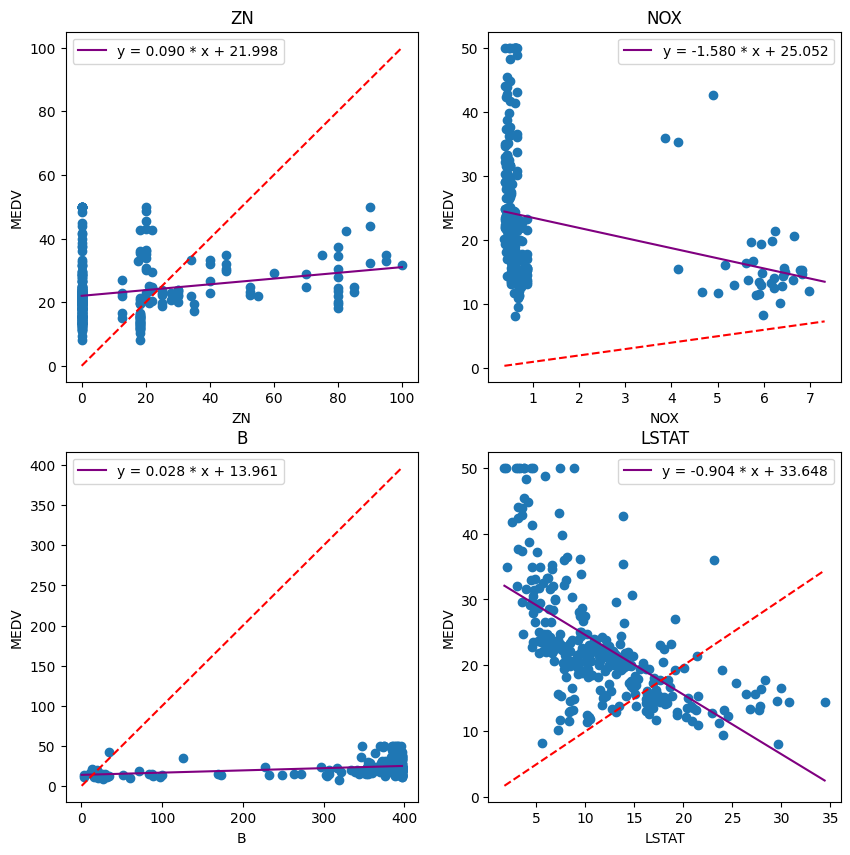

In [21]:
target_corr = df.corr()[target_column].drop(target_column)
target_corr = abs(target_corr)
threshold = 0.28
high_correlation_features = target_corr[target_corr >= threshold]
print(target_corr)
designated_feature_list = high_correlation_features.index.tolist()

figure, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axs = axs.flatten()
for ax, feature in zip(axs, designated_feature_list):
  alpha, beta = linear_regression(X_train[feature], y_train)
  predicted_values = get_regression_predictions(X_test[feature], alpha, beta)
  rmse = get_root_mean_square_error(predicted_values, y_test)
  r2_score = get_r2_score(predicted_values, y_test)
  ax.scatter(X_train[feature], y_train)
  x_values = np.linspace(min(df[feature]), max(df[feature]), 100)
  y_values = alpha * x_values + beta
  ax.plot(x_values, y_values, color='purple', label = f"y = {alpha:0.3f} * x + {beta:0.3f}")
  ax.plot(x_values, x_values, color='red', linestyle='--')
  ax.set_ylabel("MEDV")
  ax.set_xlabel(feature)
  ax.set_title(feature)
  ax.legend()
  print(feature, "RMSE score:", rmse)
  print(feature, "R2-score:", r2_score, '\n')

### 18. Scoring Methods

1. Residual Sum of Squares (RSS): RSS is a measure of the difference between the observed values and the values predicted by the model. It is calculated by summing the squared differences between the predicted and actual values.

2. Mean Squared Error (MSE): MSE is the average of the squared differences between predicted and actual values. It is a common metric used to evaluate the accuracy of regression models. MSE penalizes larger errors more heavily due to the squaring operation.

3. Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It provides a measure of the average magnitude of errors in the predicted values. RMSE is in the same units as the target variable, making it easier to interpret.

4. R2 Score: R2 score represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. It ranges from 0 to 1, where a higher R2 score indicates a better fit of the model to the data. It measures the goodness of fit of the model relative to a simple mean-based model.

### 19. Designated Features Scoring

Among the tested features, LSTAT has the lowest root mean squared error and the highest R2-score. It also has the highest correlation with the target. It can be concluded that LSTAT is the best single feature for predicting the target using linear regression.

# KNN and Decision Tree

### 21. Pruning

Pruning in decision trees refers to the process of reducing the size of the tree by removing parts of it that do not provide significant predictive power or are likely to cause overfitting.

Pros:

1. Helps prevent overfitting by reducing the complexity of the tree.
2. Improves the interpretability of the tree by removing unnecessary branches.
3. Reduces computational resources required for training and prediction.

Cons:

1. Pruning requires additional computational overhead to determine which nodes to prune and when to stop pruning.
2. Over-pruning can lead to underfitting, where the model is too simplistic and does not capture important patterns in the data.
3. It may be challenging to determine the optimal pruning strategy, leading to potential loss of predictive accuracy.

### 22. Decision Trees Comparing to Other Models

Decision trees can be better than other models in the following scenarios:

1. When the data includes both numerical and categorical features.
2. When interpretability and explainability are important, as decision trees provide easily understandable rules.
3. When dealing with non-linear relationships between features and target variables.
4. When handling missing values and outliers, as decision trees can handle them naturally without requiring preprocessing.
5. When computational resources are limited, as decision trees have relatively low computational complexity for both training and prediction.

### 23. KNN vs Neural Network Classifiers

- KNN Classifier: KNN classifier is a memory-based learning algorithm. It does not learn explicit parameters during training. Instead, it memorizes the entire training dataset and makes predictions based on the similarity of new data points to existing labeled data points. Classification is performed by a majority vote of the k nearest neighbors.
- Neural Networks and Logistic Regression: Logistic regression and neural networks both learn explicit parameters during training to model the relationship between input features and target labels. Logistic regression estimates linear weights to create a decision boundary between classes, neural networks consist of interconnected layers of neurons. During training, they adjust the weights and biases between neurons using backpropagation and gradient descent to minimize errors in predicting output labels.

In [22]:
top_threshold = df['MEDV'].quantile(0.8)
bottom_threshold = df['MEDV'].quantile(0.2)
df['category'] = 0
df.loc[df['MEDV'] >= top_threshold, 'category'] = 1
df.loc[df['MEDV'] <= bottom_threshold, 'category'] = 2
categorized_df = df.drop(columns=['MEDV'])

In [23]:
X = categorized_df.drop(columns=['category'])
y = categorized_df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN Model

### 24. One Nearest Neighbor

One nearest neighbor is a simple learning algorithm that classifies new data points based on the class label of the single nearest neighbor in the training dataset.

Pros:

1. Simple and intuitive approach.
2. Can capture complex decision boundaries in high-dimensional spaces.
3. Non-parametric nature allows it to adapt to irregular decision boundaries.

Cons:

1. Sensitive to noise and outliers in the training data.
2. Computationally expensive during prediction, especially for large datasets.
3. Poor performance in high-dimensional spaces due to the curse of dimensionality.

### 25. Distance Measurement Methods

1. Manhattan Distance: Also known as city block distance or L1 norm, Manhattan distance calculates the sum of the absolute differences between the coordinates of two points. It is computed as the sum of the absolute differences in the horizontal and vertical distances between points.

2. Minkowski Distance: Minkowski distance is a generalization of both Euclidean and Manhattan distances. It is defined as the nth root of the sum of the absolute values raised to the power of n. When n=2, it reduces to the Euclidean distance, and when n=1, it reduces to the Manhattan distance.

3. Chebyshev Distance: Chebyshev distance calculates the maximum absolute difference between the coordinates of two points along any dimension. It is computed as the maximum absolute difference between corresponding coordinates.

### Selecting Hyperparameters with test

In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan', algorithm='auto')
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy :", accuracy)

Accuracy : 0.8137254901960784


### Selecting Hyperparameters with Grid Search CV

In [25]:
knn_param_grid = {
    'n_neighbors': [5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto']
}
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_
best_knn_y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, best_knn_y_pred)
print("Best hyperparameters:", best_knn_params)
print("Accuracy:", accuracy)

Best hyperparameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.8137254901960784


## Decision Tree Model

### Selecting Hyperparameters with test

In [26]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=6, random_state=42)
decision_tree_classifier.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy :", accuracy)

Accuracy : 0.803921568627451


### Selecting Hyperparameters with Grid Search CV

In [27]:
decision_tree_param_grid = {
    'max_depth': range(5, 10),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(2, 10),
    'max_features': [9, 11, 13]
}
grid_search = GridSearchCV(estimator=decision_tree_classifier, param_grid=decision_tree_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_decision_tree_params = grid_search.best_params_
best_decision_tree_model = grid_search.best_estimator_
best_decision_tree_y_pred = best_decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, best_decision_tree_y_pred)
print("Best hyperparameters:", best_decision_tree_params)
print("Accuracy:", accuracy)

Best hyperparameters: {'max_depth': 5, 'max_features': 11, 'min_samples_leaf': 8, 'min_samples_split': 19}
Accuracy: 0.8137254901960784


### 27. GridSearchCV

GridSearchCV works by searching through a specified grid of hyperparameters for a given machine learning model. It evaluates each combination of hyperparameters using cross-validation and selects the combination that yields the best performance based on a specified evaluation metric.

These are the steps:

1. Define a grid of hyperparameters to search over.
2. For each combination of hyperparameters:
- Split the training data into multiple folds for cross-validation.
- Train the model on each fold of the training data using the current combination of hyperparameters.
- Evaluate the model's performance on the validation data using a specified evaluation metric.
3. Select the combination of hyperparameters that results in the best performance on the validation data.

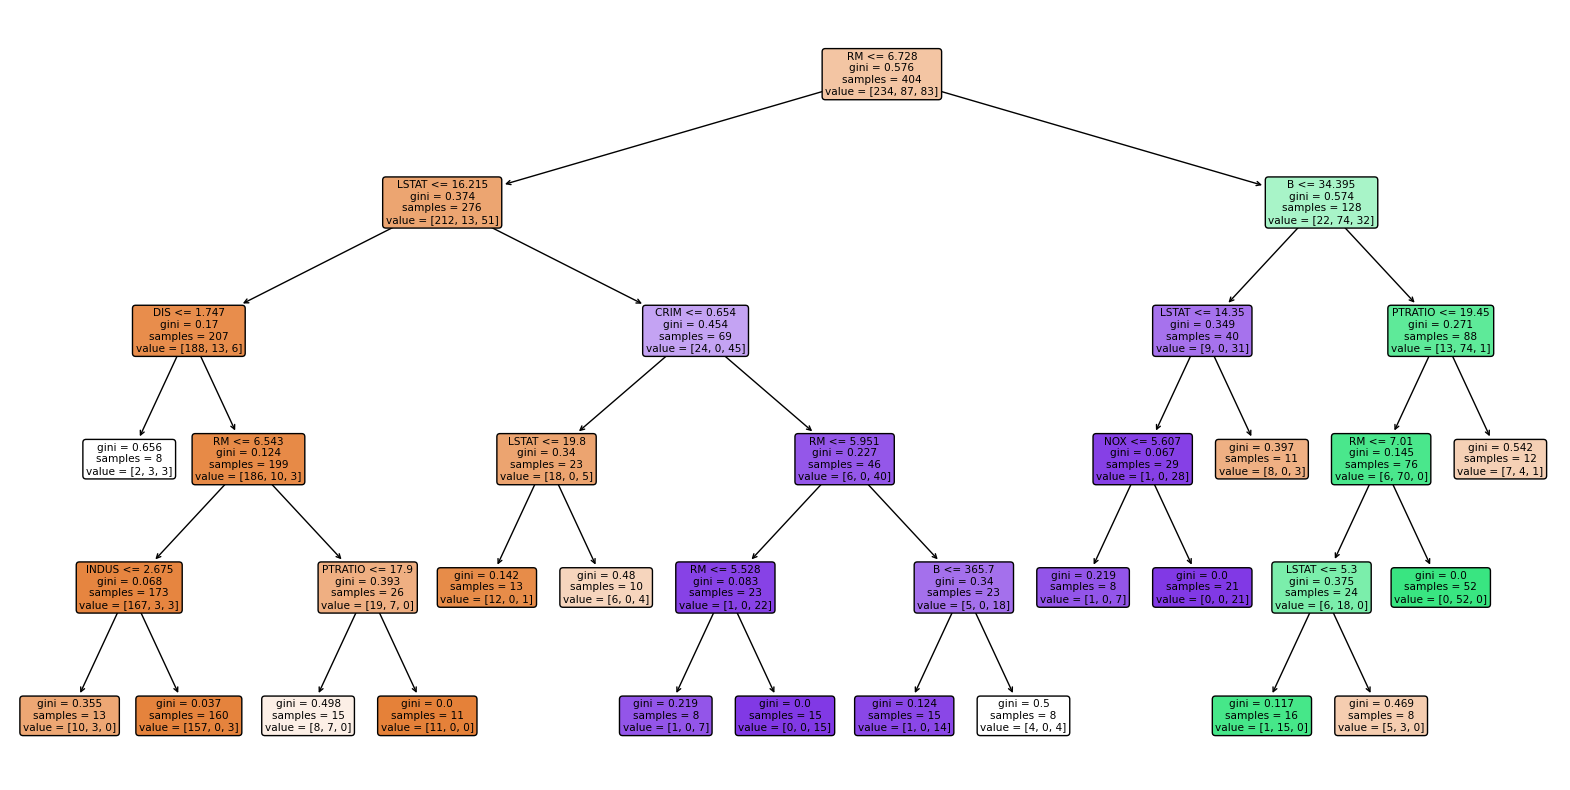

In [28]:
plt.figure(figsize=(20, 10))
plot_tree(best_decision_tree_model, feature_names=list(X.columns), filled=True, rounded=True)
plt.show()

### 29. Overfitting and Underfitting

Overfitting occurs when a machine learning model learns the training data too well, capturing noise and irrelevant patterns that do not generalize to new, unseen data. This results in a model that performs well on the training data but poorly on new data.

Underfitting occurs when a machine learning model is too simple to capture the underlying patterns in the training data. This results in a model that performs poorly both on the training data and on new data, as it fails to capture the relationships between the features and the target variable.

# Ensemble Learning

### 30. Ensemble Learning Importance

Ensemble methods are used to improve the predictive performance and robustness of machine learning models by combining multiple individual models. They are important because they often result in better performance than single models, reduce the risk of overfitting, and can handle complex relationships in the data more effectively. Additionally, ensemble methods are widely used in various domains such as finance, healthcare, and technology due to their ability to deliver high quality results in predictive modeling tasks.

### 31. Boosting and Bagging

Boosting and bagging are ensemble learning techniques used for classification:

- Bagging (Bootstrap Aggregating): Bagging involves training multiple classifiers independently on bootstrap samples (random subsets with replacement) of the training data. The final prediction is typically made by averaging the predictions of all classifiers (for regression) or by majority voting (for classification). Bagging helps reduce variance and overfitting by combining the predictions of multiple models trained on different subsets of the data.

- Boosting: Boosting involves sequentially training multiple weak classifiers (classifiers that perform slightly better than random guessing) on weighted versions of the training data. Each subsequent model focuses on the instances that the previous models misclassified, thereby "boosting" their performance. The final prediction is made by combining the predictions of all weak classifiers using a weighted sum (for regression) or a weighted voting scheme (for classification). Boosting aims to reduce bias and improve predictive performance by focusing on difficult-to-classify instances.

Differences:

1. Bagging trains multiple classifiers independently and combines their predictions using averaging or majority voting, while boosting trains classifiers sequentially and combines their predictions using weighted averaging or voting.
2. Bagging aims to reduce variance and overfitting by training models on different subsets of the data, while boosting focuses on reducing bias and improving performance by iteratively emphasizing misclassified instances.
3. Examples of bagging algorithms include Random Forest and Extra Trees, while examples of boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

## Random Forest model

### 32. How It Works

Random Forests work by training multiple decision trees on random subsets of the training data (bootstrap samples) and random subsets of the features. Each decision tree is trained independently, and the final prediction is made by aggregating the predictions of all trees (by averaging for regression or by majority voting for classification, ...). This ensemble approach helps reduce overfitting, improve generalization, and capture complex patterns in the data by combining the predictions of multiple diverse trees. Additionally, Random Forests provide estimates of feature importance based on how much each feature reduces the impurity (Gini impurity or entropy) in the tree nodes, allowing for interpretability and feature selection.

### 33. Bootstrapping

Bootstrapping in Random Forests involves sampling with replacement from the original training dataset to create multiple bootstrap samples (random subsets of the data) of the same size as the original dataset.

During each iteration of building a decision tree in the Random Forest, a bootstrap sample is used as the training data. This process introduces randomness into the training process, as each decision tree is trained on a different subset of the data.

Bootstrapping helps improve the diversity among the decision trees in the ensemble, which is crucial for the effectiveness of Random Forests. It reduces the correlation between individual trees and helps prevent overfitting by ensuring that each tree sees a slightly different perspective of the data. Consequently, the final results of the model are more robust and less prone to overfitting compared to a single decision tree.

### 34. Number of Decision Trees

Generally, increasing the number of trees can lead to better generalization and more robust predictions, up to a certain point.

The best count of decision trees depends on various factors such as the size and complexity of the dataset, the computational resources available, and the desired level of model performance. However, commonly used values for the number of trees in a Random Forest range from a few hundred to several thousand.

In practice, it's recommended to perform hyperparameter tuning, such as cross-validation, to find the optimal number of trees for a specific dataset and problem.

### 35. When to Use

Random Forests are good to use when:

- Dealing with complex datasets with high-dimensional features.
- Seeking a robust and accurate predictive model that generalizes well to unseen data.
- Handling both classification and regression tasks.
- Desiring interpretability through feature importance analysis.

It is not recommended to use Random Forests when:

- Interpreting the model's decision-making process is critical, as Random Forests can be considered "black-box" models.
- Dealing with extremely large datasets, as training multiple decision trees can be computationally expensive.
- Looking for a lightweight model with low memory and processing requirements.

### 36. Effect of Random Forest on Variance

Using Random Forest can reduce variance by averaging the predictions of multiple decision trees trained on different subsets of the data and features. This ensemble approach helps to smooth out the noise and variability present in individual trees, leading to more stable and robust predictions.

### 37. Hyperparameters

- n_estimators: The number of decision trees in the forest.

- max_depth: The maximum depth of each decision tree. Controls the complexity of individual trees and helps prevent overfitting.

- min_samples_split: The minimum number of samples required to split an internal node. Helps prevent splitting nodes with too few samples, reducing overfitting.

- min_samples_leaf: The minimum number of samples required to be at a leaf node. Helps control the size of leaf nodes and prevent overfitting.

- max_features: The maximum number of features to consider when looking for the best split. Controls the randomness of each tree and helps prevent overfitting by reducing correlation between trees.

In [29]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=random_forest_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
random_forest_best_params = grid_search.best_params_
random_forest_best_model = grid_search.best_estimator_
random_forest_y_pred = random_forest_best_model.predict(X_test)
accuracy = accuracy_score(y_test, random_forest_y_pred)
print("Best hyperparameters:", random_forest_best_params)
print("Accuracy:", accuracy)

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8431372549019608


## XGBoost model

### 38. How It Works

XGBoost (Extreme Gradient Boosting) works by sequentially training a series of weak learners, typically decision trees, to correct the errors made by previous models. It optimizes a loss function by iteratively adding new trees to the ensemble, with each tree trained on the residuals (the differences between predicted and actual values) of the previous iteration. XGBoost uses regularization techniques to prevent overfitting and parallelization to improve efficiency. It combines the predictions of multiple weak learners to make the final prediction, resulting in a powerful and accurate ensemble model.

### 39.1. Gradient Boosting

Gradient Boosting is a machine learning technique that builds an ensemble of weak learners, typically decision trees, in a sequential manner. It trains each new model to correct the errors made by the previous models, focusing on the residuals of the predictions. Gradient Boosting optimizes a loss function by iteratively adding new models to the ensemble, with each model trained to minimize the error between the actual and predicted values.

The difference between Boosting Tree and Decision Tree is in their approach and purpose:

- Boosting Tree: Boosting Tree refers to the ensemble learning method that combines multiple weak learners (often decision trees) sequentially to improve predictive performance. It focuses on reducing bias and improving accuracy by iteratively adding models that correct the errors made by previous models.

- Decision Tree: Decision Tree is a single machine learning model that recursively splits the dataset into subsets based on the values of input features, with the goal of maximizing the homogeneity of the target variable within each subset. Decision trees can be used independently or as building blocks in ensemble methods like Boosting Tree.

### 39.2. Hyperparameters

- n_estimators: The number of boosting rounds or the number of trees in the ensemble. 

- max_depth: The maximum depth of each decision tree in the ensemble. Controls the complexity of individual trees and helps prevent overfitting.

- learning_rate: The step size at which each boosting round contributes to the overall model. A higher learning rate may lead to faster convergence but can also increase the risk of overfitting. Adjusting the learning rate allows for fine-tuning the trade-off between model performance and training time.

In [30]:
xgb_classifier = XGBClassifier(random_state=42)
xgboost_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgboost_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
xgboost_best_params = grid_search.best_params_
xgboost_best_model = grid_search.best_estimator_
xgboost_y_pred = xgboost_best_model.predict(X_test)
accuracy = accuracy_score(y_test, xgboost_y_pred)
print("Best hyperparameters:", xgboost_best_params)
print("Accuracy:", accuracy)

Best hyperparameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 150}
Accuracy: 0.8529411764705882


# Support Vector Machine

### 40. Random Search vs Grid Search

It's better to use Grid Search in this project since the search space of hyperparameters is small and well defined and computational resources are sufficient.

## RBF Kernel

In [31]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
rbf_svc_y_pred = rbf_svc.predict(X_test)
accuracy = accuracy_score(y_test, rbf_svc_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.696078431372549


#### Random Search

In [32]:
rbf_param_random = {
    'C': uniform(loc=0, scale=10),
    'gamma': ['scale', 'auto']
}
random_search = RandomizedSearchCV(estimator=rbf_svc, param_distributions=rbf_param_random, n_iter=10, scoring='accuracy', cv=10, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_rbf_model = random_search.best_estimator_
best_rbf_y_pred = best_rbf_model.predict(X_test)
accuracy = accuracy_score(y_test, best_rbf_y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'C': 8.324426408004218, 'gamma': 'auto'}
Accuracy: 0.7647058823529411


#### Grid Search

In [33]:
rbf_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(estimator=rbf_svc, param_grid=rbf_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rbf_model = grid_search.best_estimator_
best_rbf_y_pred = best_rbf_model.predict(X_test)
accuracy = accuracy_score(y_test, best_rbf_y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'C': 100, 'gamma': 'scale'}
Accuracy: 0.7549019607843137


## Linear Kernel

In [34]:
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
linear_svc_y_pred = linear_svc.predict(X_test)
accuracy = accuracy_score(y_test, linear_svc_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.803921568627451


#### Random Search

In [35]:
linear_param_random = {
    'C': uniform(loc=0, scale=5),
    'gamma': ['scale', 'auto']
}
random_search = RandomizedSearchCV(estimator=linear_svc, param_distributions=linear_param_random, n_iter=10, scoring='accuracy', cv=10, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_linear_model = random_search.best_estimator_
best_linear_y_pred = best_linear_model.predict(X_test)
accuracy = accuracy_score(y_test, best_linear_y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'C': 1.8727005942368125, 'gamma': 'scale'}
Accuracy: 0.803921568627451


#### Grid Search

In [36]:
linear_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(estimator=linear_svc, param_grid=linear_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_linear_model = grid_search.best_estimator_
best_linear_y_pred = best_linear_model.predict(X_test)
accuracy = accuracy_score(y_test, best_linear_y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'C': 0.1, 'gamma': 'scale'}
Accuracy: 0.7941176470588235


# Scoring

In [37]:
class Score_Calculator():
    def __init__(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test

    def confusion_matrix(self, model):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(self.y_test, y_pred)
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

    def report(self, model):
        y_pred = model.predict(X_test)
        report = classification_report(self.y_test, y_pred, zero_division=0)
        print(report)

    def all_scores(self, model):
        score_calculator.confusion_matrix(model)
        score_calculator.report(model)

In [38]:
score_calculator = Score_Calculator(X_test, y_test)

## KNN Scoring

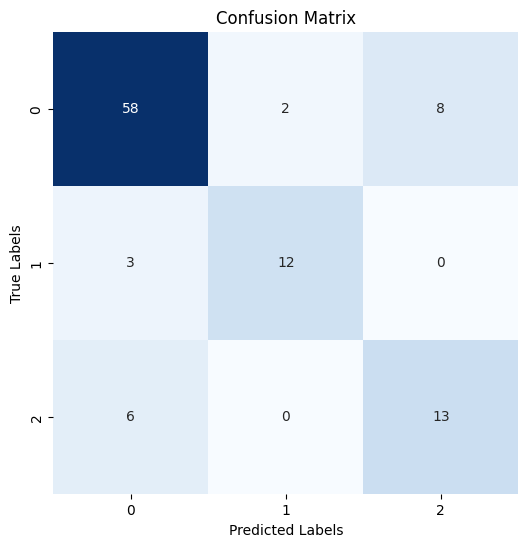

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        68
           1       0.86      0.80      0.83        15
           2       0.62      0.68      0.65        19

    accuracy                           0.81       102
   macro avg       0.78      0.78      0.78       102
weighted avg       0.82      0.81      0.82       102



In [39]:
score_calculator.all_scores(best_knn_model)

## Decision Tree Scoring

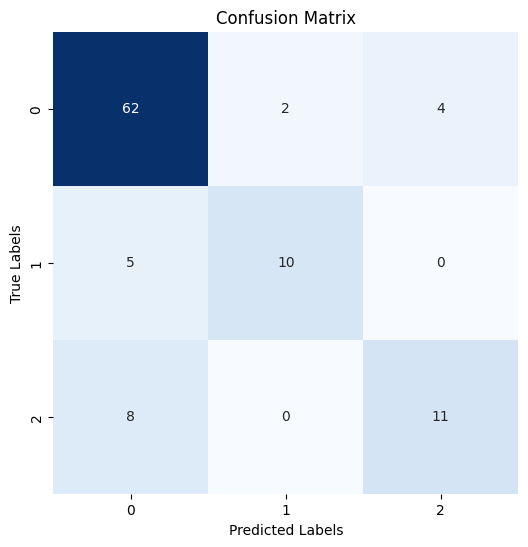

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        68
           1       0.83      0.67      0.74        15
           2       0.73      0.58      0.65        19

    accuracy                           0.81       102
   macro avg       0.80      0.72      0.75       102
weighted avg       0.81      0.81      0.81       102



In [40]:
score_calculator.all_scores(best_decision_tree_model)

## Random Forest Scoring

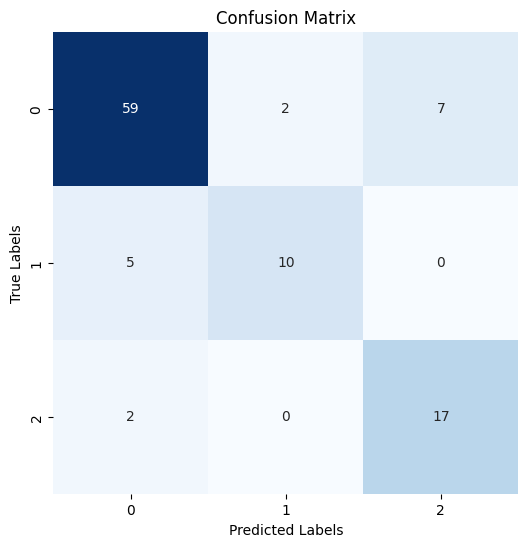

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        68
           1       0.83      0.67      0.74        15
           2       0.71      0.89      0.79        19

    accuracy                           0.84       102
   macro avg       0.81      0.81      0.80       102
weighted avg       0.85      0.84      0.84       102



In [41]:
score_calculator.all_scores(random_forest_best_model)

## XGBoost Scoring

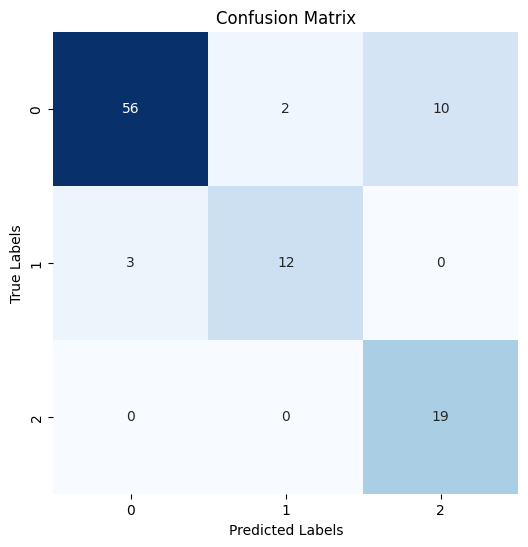

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        68
           1       0.86      0.80      0.83        15
           2       0.66      1.00      0.79        19

    accuracy                           0.85       102
   macro avg       0.82      0.87      0.83       102
weighted avg       0.88      0.85      0.86       102



In [42]:
score_calculator.all_scores(xgboost_best_model)

## Support Vector Machine Scoring

### RBF Kernel

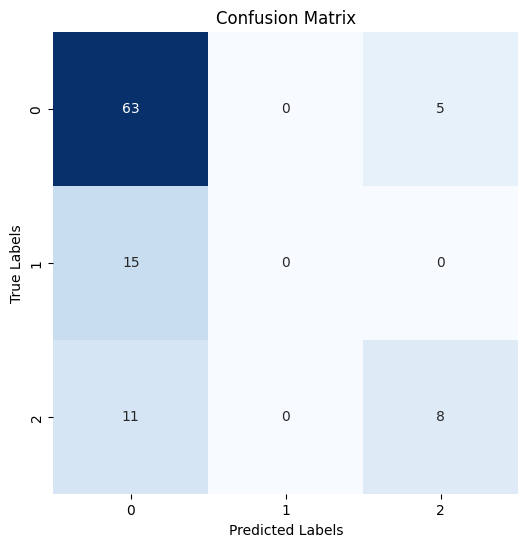

              precision    recall  f1-score   support

           0       0.71      0.93      0.80        68
           1       0.00      0.00      0.00        15
           2       0.62      0.42      0.50        19

    accuracy                           0.70       102
   macro avg       0.44      0.45      0.43       102
weighted avg       0.59      0.70      0.63       102



In [43]:
score_calculator.all_scores(rbf_svc)

### Linear Kernel

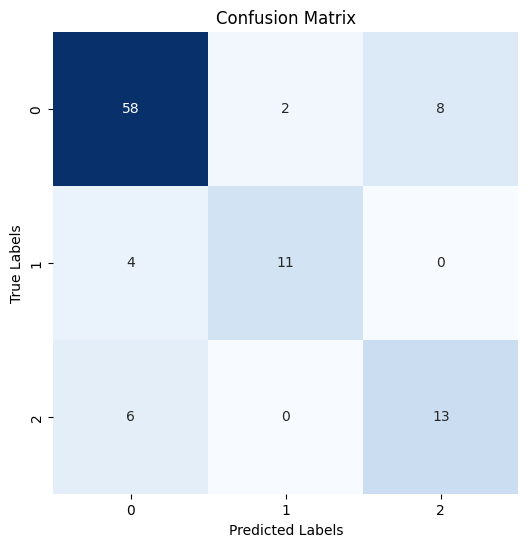

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        68
           1       0.85      0.73      0.79        15
           2       0.62      0.68      0.65        19

    accuracy                           0.80       102
   macro avg       0.77      0.76      0.76       102
weighted avg       0.81      0.80      0.81       102



In [44]:
score_calculator.all_scores(linear_svc)